# Human hepatic galactose model
*Matthias König*

Simulations for validation of the single cell model.

**Requirements**

* `antimony`
* `roadrunner`
* `matplotlib`

In [19]:
from __future__ import print_function, division
# print settings for notebook 
%matplotlib inline

import matplotlib as mpl
import matplotlib.pylab as plt
mpl.rcParams;

mpl.rcParams['figure.figsize'] = (9.0, 6.0)
mpl.rcParams['axes.labelsize'] = 'medium'
font = {'family': 'sans-serif',
        'weight': 'normal',  # bold
        'size': 14}
mpl.rc('font', **font)

## Validation
Validate the galactose model.

In [20]:
from multiscale.sbmlutils import validation
galactose_sbml = "galactose_28_annotated.xml"
vres = validation.validate_sbml(galactose_sbml, ucheck=True)

 filename : galactose_28_annotated.xml
 file size (byte) : 220210
 read time (ms) : 41.993141
 c-check time (ms) : 202.768087
 validation error(s) : 0
 (consistency error(s)): 0
 validation warning(s) : 0
 (consistency warning(s)): 0 



## Simulation

After the model definition the model can be be simulated.
We can now use the defined model for some simulations. We use `roadrunner` for the simulations.

In [21]:
import roadrunner
rr = roadrunner.RoadRunner(galactose_sbml)
rr.selections

['time',
 '[c__ppi]',
 '[e__h2oM]',
 '[c__glc1p]',
 '[c__udpgal]',
 '[c__udp]',
 '[c__atp]',
 '[c__utp]',
 '[e__gal]',
 '[c__gal1pM]',
 '[c__gal]',
 '[c__galtolM]',
 '[e__galM]',
 '[c__glc6p]',
 '[c__adp]',
 '[h__h2oM]',
 '[c__nadp]',
 '[c__udpgalM]',
 '[c__galM]',
 '[c__galtol]',
 '[c__nadph]',
 '[c__glc6pM]',
 '[c__glc1pM]',
 '[c__udpglc]',
 '[c__gal1p]',
 '[c__udpglcM]',
 '[c__phos]']

[  5.87500000e-15   2.35000000e-15   5.87500000e-15   6.25000000e-10]
< roadrunner.SimulateOptions() 
{ 
'this' : 0x4862a40, 
'reset' : 0,
'structuredResult' : 0,
'copyResult' : 1,
'steps' : 50,
'start' : 0,
'duration' : 5
}>
abs tol: 2.35e-21
abs tol: 1e-06


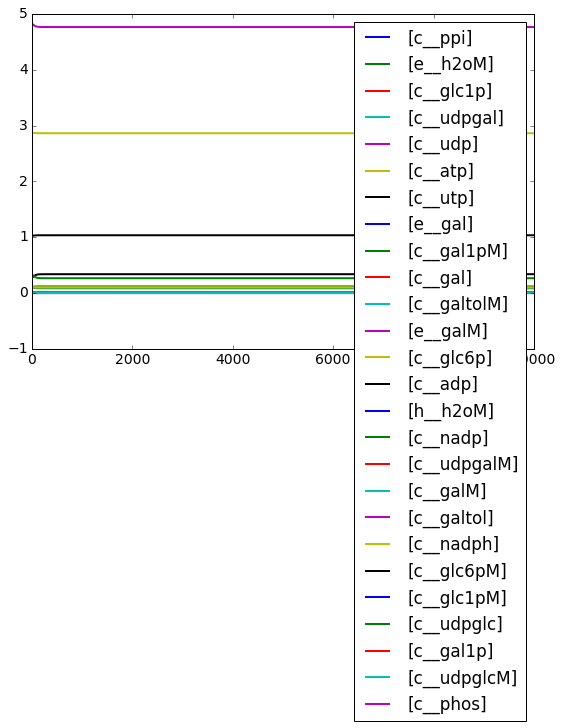

('relative_tolerance', 'absolute_tolerance', 'stiff', 'maximum_bdf_order', 'maximum_adams_order', 'maximum_num_steps', 'maximum_time_step', 'minimum_time_step', 'initial_time_step', 'multiple_steps', 'variable_step_size')
           time,   [c__ppi], [e__h2oM], [c__glc1p], [c__udpgal],  [c__udp], [c__atp], [c__utp],    [e__gal],  [c__gal1pM],    [c__gal], [c__galtolM],    [e__galM], [c__glc6p], [c__adp], [h__h2oM], [c__nadp], [c__udpgalM],    [c__galM], [c__galtol], [c__nadph],  [c__glc6pM],  [c__glc1pM], [c__udpglc], [c__gal1p], [c__udpglcM], [c__phos]
 [[           0,      0.008,         0,      0.012,        0.11,      0.09,      2.7,     0.27,     0.00012,            0,     0.00012,            0,            0,       0.12,      1.2,         0,       0.1,            0,            0,       0.001,        0.1,            0,            0,        0.34,      0.001,            0,         5],
  [  3.0804e-05, 0.00797183,         0,   0.012028,        0.11, 0.0901899,  2.70029, 0.269838,     

In [22]:
# Simulation 
rr.reset()
print(rr.model.getCompartmentVolumes())

# result = rr.simulate(start=0, end=1, steps=100)
absTol = 1E-6 * min(rr.model.getCompartmentVolumes()) #  absTol relative to amounts
relTol = 1E-6
# model works with either stiff or non-stiff solver
rr.getIntegrator().setValue('stiff', True)
# tighten tolerance
rr.getIntegrator().setValue('absolute_tolerance', absTol)
rr.getIntegrator().setValue('relative_tolerance', relTol)
rr.getIntegrator().setValue('variable_step_size', True)

print(rr.simulateOptions)
print('abs tol: {}'.format(rr.getIntegrator().getValue('absolute_tolerance')))
print('abs tol: {}'.format(rr.getIntegrator().getValue('relative_tolerance')))

# Simulate to steady state
s = rr.simulate(start=0, end=10000, plot=True)
s
import pandas as pd
from pandas import DataFrame
DataFrame(s, columns=rr.selections)

import numpy as np

integrator = rr.getIntegrator()
print(integrator.getSettings())

print(s)

        time  [c__ppi]  [e__h2oM]  [c__glc1p]  [c__udpgal]  [c__udp]  \
0   0.000000  0.006844          0    0.011965     0.084111  0.122246   
1   0.993248  0.006844          0    0.011965     0.084111  0.122246   
2  34.259638  0.006844          0    0.011965     0.084111  0.122246   
3  50.000000  0.006844          0    0.011965     0.084111  0.122246   

   [c__atp]  [c__utp]  [e__gal]   [c__gal1pM]    ...      [c__udpgalM]  \
0  2.864129  0.337987  0.000104 -4.550927e-36    ...     -1.536555e-35   
1  2.864129  0.337987  0.000104 -5.724336e-36    ...     -1.218967e-35   
2  2.864129  0.337987  0.000104 -2.354148e-36    ...     -1.864717e-36   
3  2.864129  0.337987  0.000104 -8.532112e-38    ...     -5.168315e-38   

      [c__galM]  [c__galtol]  [c__nadph]   [c__glc6pM]   [c__glc1pM]  \
0 -1.311436e-36     0.000419    0.100153 -3.482360e-36 -5.317704e-37   
1 -2.036459e-36     0.000419    0.100153 -2.009883e-36 -2.935779e-37   
2 -3.375427e-37     0.000419    0.100152 -1.518823e-

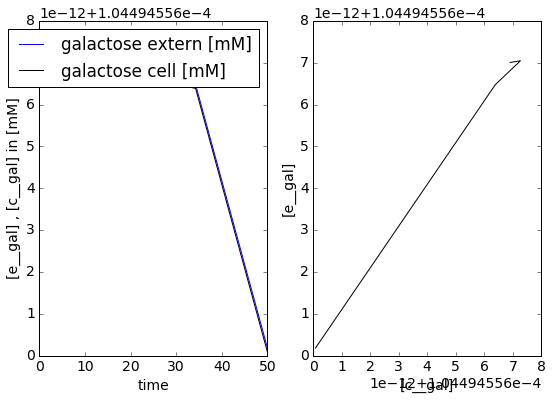

In [23]:
tend = 50
s = rr.simulate(0, tend, plot=False)
from pandas import DataFrame
print(DataFrame(s, columns=rr.selections))

# create plot
plt.subplot(121)
plt.plot(s['time'], s['[e__gal]'], color='blue', label='galactose extern [mM]')
plt.plot(s['time'], s['[c__gal]'], color='black', label='galactose cell [mM]')
plt.legend()
plt.xlabel('time')
plt.ylabel('[e__gal] , [c__gal] in [mM]');
plt.xlim([0, tend])

plt.subplot(122)
plt.plot(s['[c__gal]'], s['[e__gal]'], color="black")
plt.xlabel('[c__gal]')
plt.ylabel('[e__gal]');